#📌 Extracción

In [253]:
import requests
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/Saya-Sayita/Challenge2-TelecomX-main/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación y revision de estructura de los datos

---



In [254]:
df.info() #visualiza informacion de columnas valores no nulos y sus tipos de datos, estructura del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [255]:
#normalizamos los datos para que esten en una sola tabla (df) sin datos anidados
from pandas import json_normalize
df = json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4


In [256]:
df.info() #visualizamos estructura final del archivo json

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [257]:
#Visualizamos tipo de datos de columnas vs informacion que contienen para poder operar

## **Diccionario de datos**
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [258]:
# Cambiamos tipo de datos columna account.Charges.Total a tipo entero (float64) para poder calcular
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Validación de los datos

In [259]:
#validacion de valores unicos por columna y cantidad
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 30: # Imprime valores solo si son menos de 30
    print(df[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [260]:
# identificando si existen numeros duplicados
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

In [261]:
# identificando si existen numeros nulos
nulos = df.isnull().sum()
nulos

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [262]:
#identificando las lineas que estan nulas en cargo.total
Lineas_con_total_vacio = df[df['account.Charges.Total'].isnull()]
Lineas_con_total_vacio

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [263]:
#Elimino las 11 lineas account.Charges.Total que estan vacias de df
df_normalizado = df.dropna(subset=['account.Charges.Total'])
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,"1,237.85"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,"1,873.70"
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,"4,627.65"


In [264]:
#identificando el número de valores vacíos o que contienen solo espacios en blanco en cada columna del DataFrame df
valores_en_blanco_o_vacio = df.apply(lambda x: x.astype(str).str.strip() == '').sum()

In [265]:
valores_en_blanco_o_vacio

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [266]:
# Eliminando las lineas que estan vacias o blanco en columna churn ya que por un lado la muestra es pequeña y por otro lado es un dato que no puedo interpretar si se han ido o no. No se puede considerar para el analisis
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != ''].copy()
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,"1,237.85"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,"1,873.70"
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,"4,627.65"


#📊 Carga y análisis

In [267]:
df_normalizado.info() #visualizamos estructura final del archivo json

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [268]:
#muestra estadisticas de las columnas numericas, Esto incluye el conteo, la media, la desviación estándar, los valores mínimos y máximos, y los valores de los cuartiles
#desplegar los valores formateados con separador de miles y 2 decimales
pd.options.display.float_format = '{:,.2f}'.format
df_normalizado.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,"7,032.00","7,032.00","7,032.00","7,032.00"
mean,0.16,32.42,64.80,"2,283.30"
std,0.37,24.55,30.09,"2,266.77"
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,"1,397.47"
75%,0.00,55.00,89.86,"3,794.74"
max,1.00,72.00,118.75,"8,684.80"


In [269]:
# Valido datos para el df final que analizaremos con datos limpios valores unicos por columna y cantidad
for col in df_normalizado.columns:
  print(f"valores únicos en columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 30: # Imprime valores solo si son menos de 30
    print(df_normalizado[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en columna'customerID': 7032
valores únicos en columna'Churn': 2
['No' 'Yes']
--------------------------------------------------
valores únicos en columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en columna'customer.tenure': 72
valores únicos en columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No']
-------------------------------

In [270]:
#Creo nueva columna con precio diario
df_normalizado['precio_diario'] = df_normalizado['account.Charges.Monthly'].apply(lambda x: f"{x / 30:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,precio_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,"2,19"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,"2,00"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,"2,46"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,"1,237.85","3,27"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,"2,80"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,"1,84"
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,"1,873.70","2,84"
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,"1,68"
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,"4,627.65","2,26"


In [271]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [272]:
# cambio tipo de datos de columna creada precio_diario
df_normalizado['precio_diario'] = df_normalizado['precio_diario'].str.replace(',', '.').astype(float)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

##Grafico de Fugas por Genero

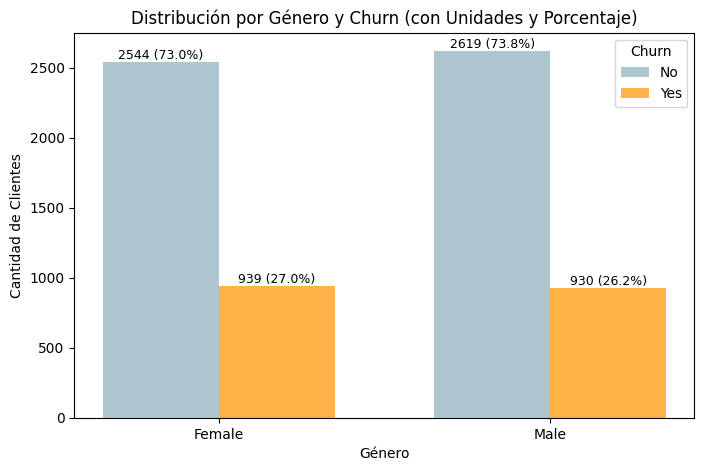

In [273]:
counts = df_normalizado.groupby(['customer.gender', 'Churn']).size().reset_index(name='count')
total_per_gender = counts.groupby('customer.gender')['count'].transform('sum')
counts['percentage'] = counts['count'] / total_per_gender * 100
counts['text'] = counts.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)

genders = counts['customer.gender'].unique()
churn_status = counts['Churn'].unique()
width = 0.35
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

fig, ax = plt.subplots(figsize=(8,5))

positions = np.arange(len(genders))

for i, churn in enumerate(churn_status):
    vals = []
    texts = []
    for gender in genders:
        row = counts[(counts['customer.gender'] == gender) & (counts['Churn'] == churn)]
        if not row.empty:
            vals.append(row['count'].values[0])
            texts.append(row['text'].values[0])
        else:
            vals.append(0)
            texts.append('')
    bars = ax.bar(positions + i*width, vals, width=width, label=str(churn), color=colors[churn])

    for bar, label in zip(bars, texts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom', fontsize=9)

ax.set_xticks(positions + width/2)
ax.set_xticklabels(genders)
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad de Clientes')
ax.set_title('Distribución por Género y Churn (con Unidades y Porcentaje)')
ax.legend(title='Churn')

plt.show()

### Distribución de Fugas (Churn) por SeniorCitizen (Unidades + %)

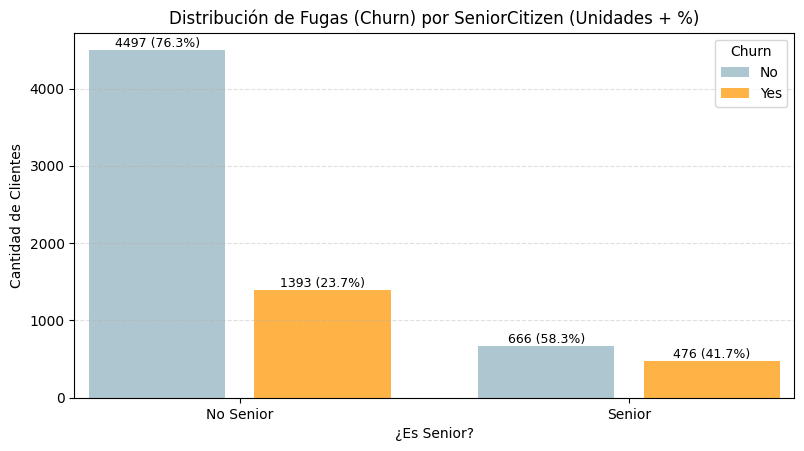

In [274]:
counts = df_normalizado.groupby(['customer.SeniorCitizen', 'Churn']).size().reset_index(name='count')
counts['percentage'] = counts['count'] / counts.groupby('customer.SeniorCitizen')['count'].transform('sum') * 100
counts['text'] = counts.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)
counts['customer.SeniorCitizen'] = counts['customer.SeniorCitizen'].replace({0: 'No Senior', 1: 'Senior'})

# Parámetros de gráfico
categories = ['No Senior', 'Senior']
churn_values = ['No', 'Yes']
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}
bar_width = 0.35
group_spacing = 0.15
x = np.arange(len(categories))
total_width = 2 * bar_width + group_spacing

# Crear figura
fig, ax = plt.subplots(figsize=(8, 5))

for i, churn in enumerate(churn_values):
    offset = (i - 0.5) * (bar_width + group_spacing / 2)
    positions = x + offset
    values = []

    for cat in categories:
        match = counts[(counts['customer.SeniorCitizen'] == cat) & (counts['Churn'] == churn)]
        count = match['count'].values[0] if not match.empty else 0
        values.append(count)

    bars = ax.bar(positions, values, width=bar_width, label=churn, color=colors[churn])

    for pos, cat, val in zip(positions, categories, values):
        if val > 0:
            pct = counts[(counts['customer.SeniorCitizen'] == cat) & (counts['Churn'] == churn)]['percentage'].values[0]
            ax.text(pos, val + 2, f"{val} ({pct:.1f}%)", ha='center', va='bottom', fontsize=9)

# Ejes
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylabel('Cantidad de Clientes')
ax.set_xlabel('¿Es Senior?')
ax.set_title('Distribución de Fugas (Churn) por SeniorCitizen (Unidades + %)')
ax.set_xlim(x[0] - total_width / 2, x[-1] + total_width / 2)

# Leyenda y estilo
ax.legend(title='Churn')
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.15, top=0.88)

plt.show()

## Distribución de Fugas(Churn) según Meses de Permanencia

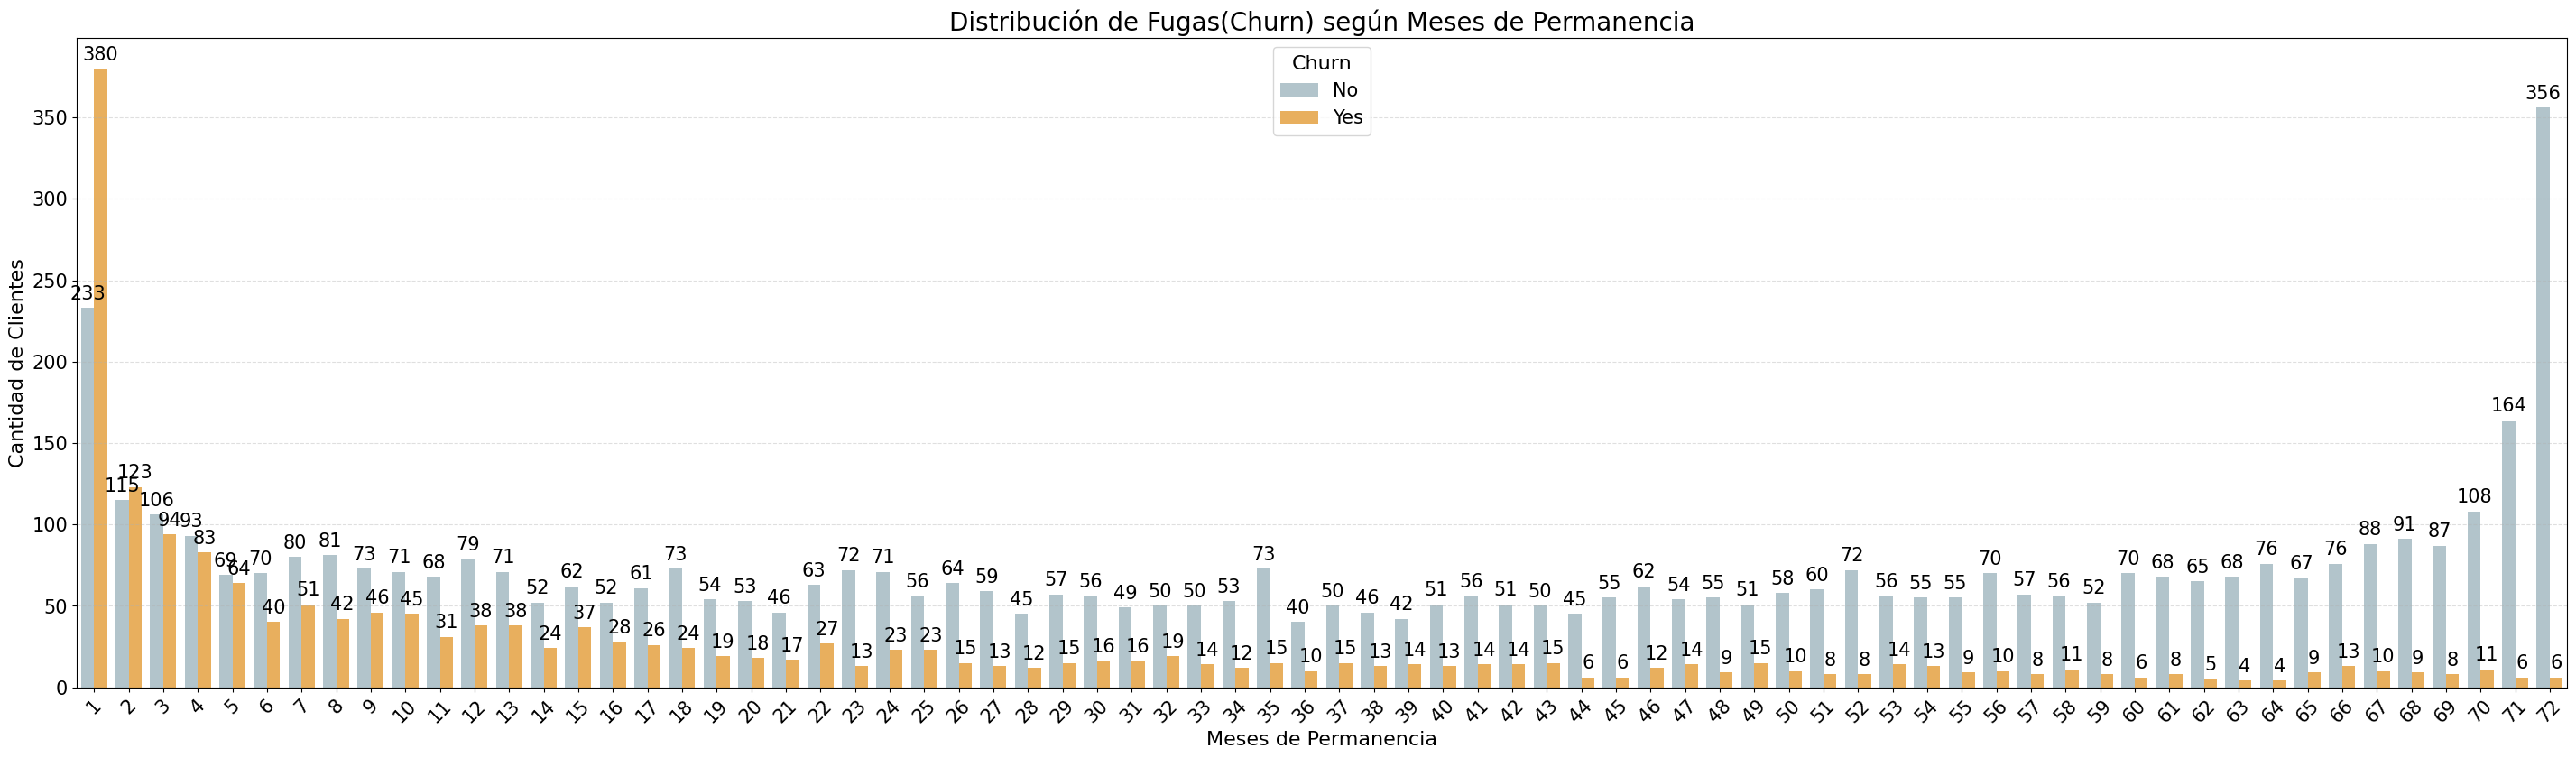

In [275]:
# Agrupa los datos por tenure y Churn
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().reset_index(name='Cantidad')

# Creo figura
plt.figure(figsize=(30, 10))  # Ancho para separar las barras

# Crea gráfico de barras agrupadas
ax = sns.barplot(
    data=df_grouped,
    x='customer.tenure',
    y='Cantidad',
    hue='Churn',
    palette=['#AEC6CF', '#FFB347'],
    dodge=True,
    width=0.75  # grosor de barras
)

# Muestro los valores sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=15, padding=4)

# Título y etiquetas de ejes
ax.set_title('Distribución de Fugas(Churn) según Meses de Permanencia', fontsize=20)
ax.set_xlabel('Meses de Permanencia', fontsize=16)
ax.set_ylabel('Cantidad de Clientes', fontsize=16)

# Ajustar tamaño de etiquetas del eje X y Y
ax.tick_params(axis='x', labelsize=15, rotation=45)
ax.tick_params(axis='y', labelsize=15)

# Leyenda
ax.legend(title='Churn', title_fontsize=16, fontsize=15)

# Grid horizontal
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Márgenes ajustados para visualización completa
plt.subplots_adjust(left=0.06, right=0.98, bottom=0.18, top=0.9)

plt.show()

### Tasa de fuga segun meses de permanencia (%)

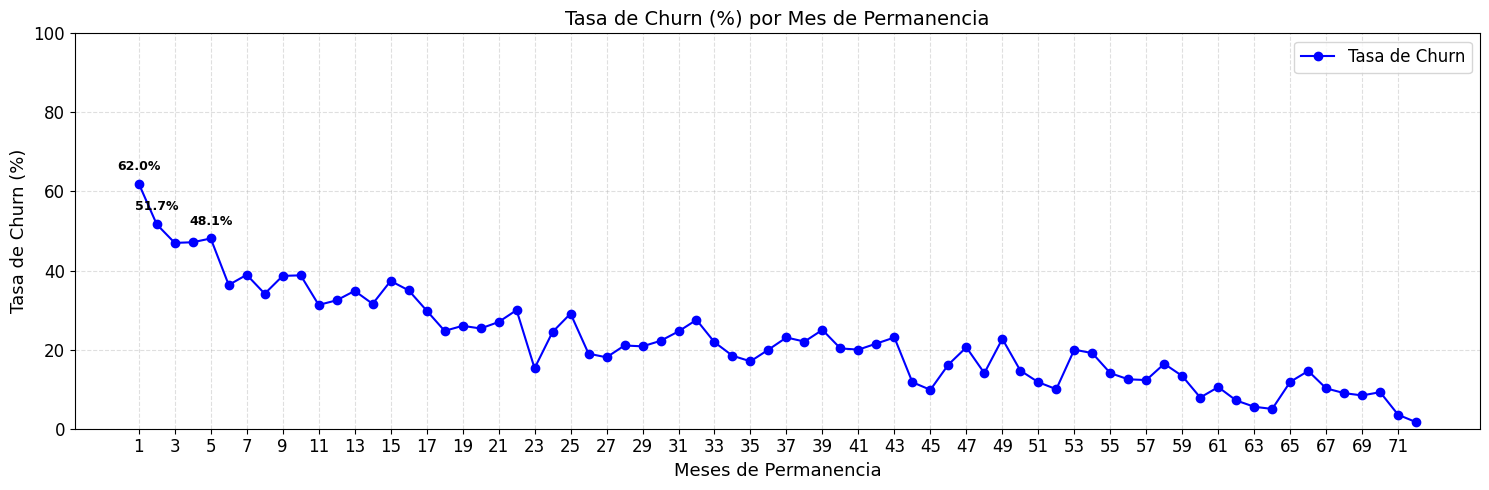

In [276]:
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calcular tasa de churn
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Resetear índice
df_churn_rate = df_grouped.reset_index()

# Identificar los 3 meses con mayor tasa de churn
top_fugas = df_churn_rate.sort_values(by='churn_rate', ascending=False).head(3)

# Crear gráfico
plt.figure(figsize=(15, 5))
plt.plot(df_churn_rate['customer.tenure'],
         df_churn_rate['churn_rate'],
         marker='o',
         linestyle='-',
         color= 'blue', #'#FFB347',
         label='Tasa de Churn')

# Agregar etiquetas en los puntos de mayor fuga
for _, row in top_fugas.iterrows():
    plt.annotate(f"{row['churn_rate']:.1f}%",
                 (row['customer.tenure'], row['churn_rate']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=9,
                 color='black',
                 weight='bold')

# Mostrar solo algunos ticks en el eje X para mejor visualización
ticks_x = df_churn_rate['customer.tenure'][::2]  # cada 2 meses
plt.xticks(ticks_x, fontsize=12)
plt.yticks(fontsize=12)

# Títulos y formato
plt.title('Tasa de Churn (%) por Mes de Permanencia', fontsize=14)
plt.xlabel('Meses de Permanencia', fontsize=13)
plt.ylabel('Tasa de Churn (%)', fontsize=13)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()

### Promedio de Cargas mensuales por permanencia y fuga

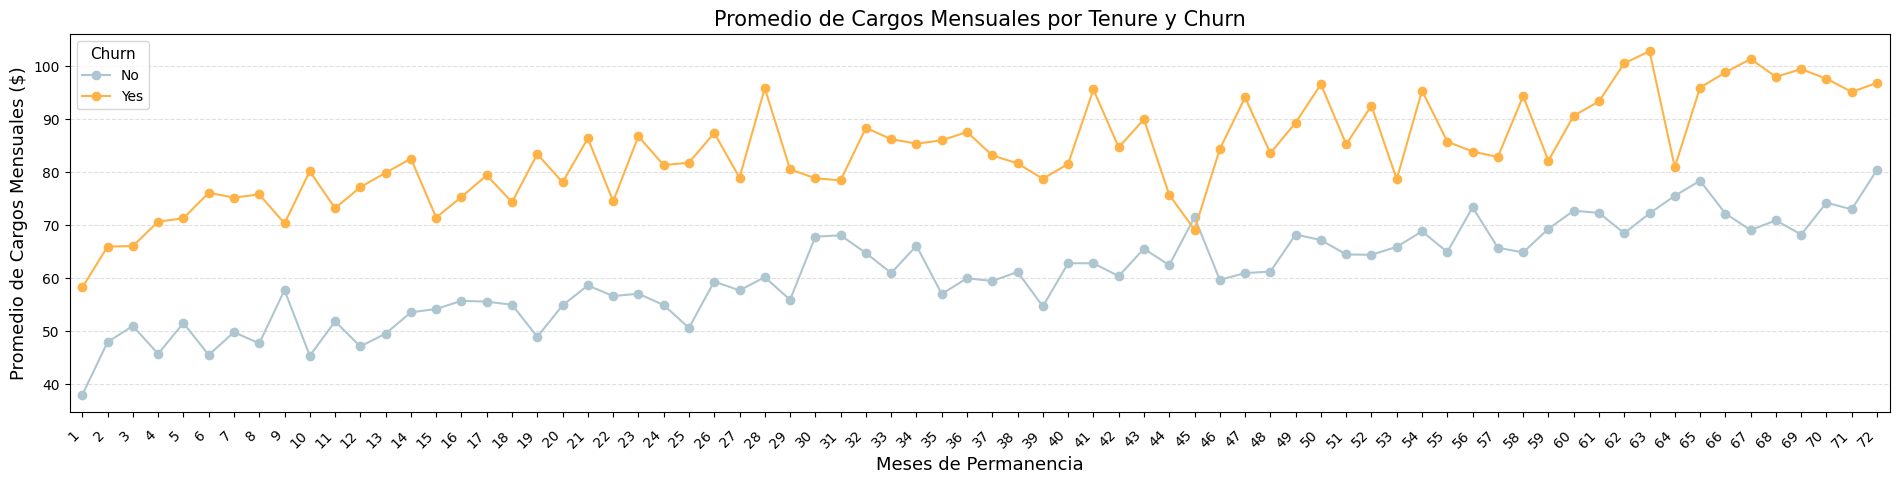

In [277]:
#Visualizando en que mes de permanencia se produce mayor porcentaje de fuga
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn'])['account.Charges.Monthly'].mean().reset_index()

# Separar por churn
df_yes = df_grouped[df_grouped['Churn'] == 'Yes']
df_no = df_grouped[df_grouped['Churn'] == 'No']

# Crear gráfico más ancho y controlado
fig, ax = plt.subplots(figsize=(20, 6))  # Gráfico más extendido

# Línea para 'No'
ax.plot(df_no['customer.tenure'],
        df_no['account.Charges.Monthly'],
        marker='o',
        linestyle='-',
        color='#AEC6CF',
        label='No')

# Línea para 'Yes'
ax.plot(df_yes['customer.tenure'],
        df_yes['account.Charges.Monthly'],
        marker='o',
        linestyle='-',
        color='#FFB347',
        label='Yes')

# Título y etiquetas
ax.set_title('Promedio de Cargos Mensuales por Tenure y Churn', fontsize=15)
ax.set_xlabel('Meses de Permanencia', fontsize=13)
ax.set_ylabel('Promedio de Cargos Mensuales ($)', fontsize=13)

# Eje X: mostrar todos los meses
xticks = sorted(df_grouped['customer.tenure'].unique())
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right', fontsize=10)
ax.tick_params(axis='x', which='major', pad=8)

# Reducir espacio entre 0 y 1 (agregar margen muy leve)
ax.set_xlim(min(xticks) - 0.5, max(xticks) + 0.5)

# Mejorar visibilidad del eje Y
ax.yaxis.set_tick_params(labelsize=10)

# Grilla
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Leyenda
ax.legend(title='Churn', fontsize=10, title_fontsize=11)

# Márgenes ajustados
plt.subplots_adjust(left=0.07, right=0.98, bottom=0.25, top=0.88)

# Mostrar
plt.show()

###Distribucion de Fugas por tipos de contrato

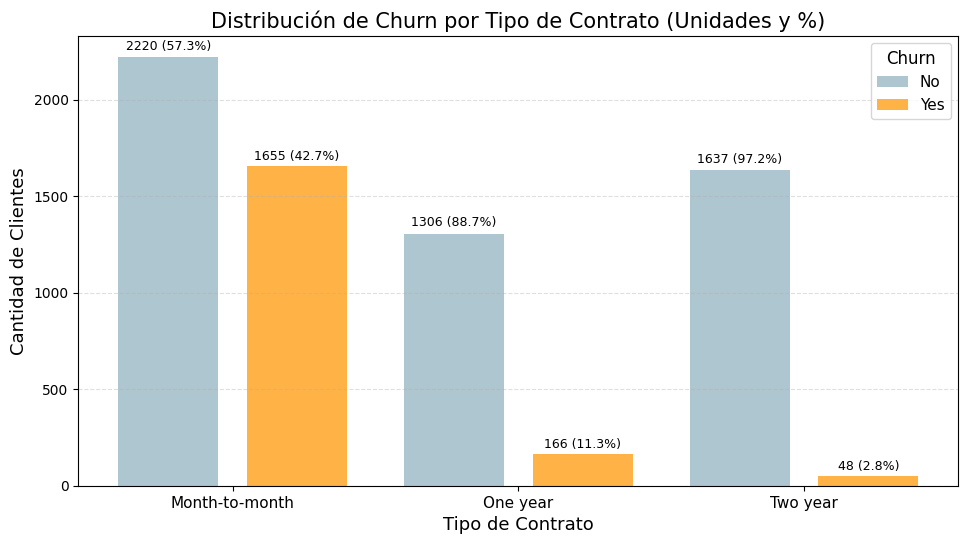

In [278]:
counts = df_normalizado.groupby(['account.Contract', 'Churn']).size().reset_index(name='count')

# Calcular total por contrato para porcentaje
total_per_contract = counts.groupby('account.Contract')['count'].transform('sum')
counts['percentage'] = counts['count'] / total_per_contract * 100

# Etiquetas para texto en las barras
counts['text'] = counts.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)

# Categorías y churn
categories = counts['account.Contract'].unique()
churn_values = ['No', 'Yes']
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

# Configuración posiciones y ancho
bar_width = 0.35
group_spacing = 0.2
x = np.arange(len(categories))
total_width = 2 * bar_width + group_spacing

fig, ax = plt.subplots(figsize=(10, 6))

for i, churn in enumerate(churn_values):
    offset = (i - 0.5) * (bar_width + group_spacing / 2)
    positions = x + offset
    values = []
    texts = []
    for cat in categories:
        val = counts.loc[(counts['account.Contract'] == cat) & (counts['Churn'] == churn), 'count']
        pct = counts.loc[(counts['account.Contract'] == cat) & (counts['Churn'] == churn), 'percentage']
        if not val.empty:
            values.append(val.values[0])
            texts.append(f"{val.values[0]} ({pct.values[0]:.1f}%)")
        else:
            values.append(0)
            texts.append("")
    bars = ax.bar(positions, values, width=bar_width, label=churn, color=colors[churn])

    # Agregar texto sobre barras
    for pos, val, txt in zip(positions, values, texts):
        if val > 0:
            ax.text(pos, val + max(values)*0.01, txt, ha='center', va='bottom', fontsize=9)

# Ejes y formato
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=11)
ax.set_xlabel('Tipo de Contrato', fontsize=13)
ax.set_ylabel('Cantidad de Clientes', fontsize=13)
ax.set_title('Distribución de Churn por Tipo de Contrato (Unidades y %)', fontsize=15)

# Líneas guía y leyenda
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(title='Churn', fontsize=11, title_fontsize=12)

plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.9)

plt.show()

### Promedio de Carga Mensual de clientes en Churn

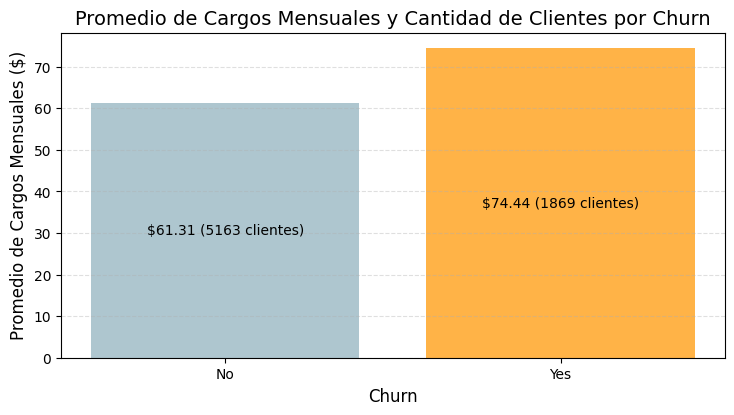

In [279]:
df_resumen = df_normalizado.groupby('Churn').agg(
    Promedio_Cargos=('account.Charges.Monthly', 'mean'),
    Cantidad_Clientes=('account.Charges.Monthly', 'count')
).reset_index()

# Redondear promedio
df_resumen['Promedio_Cargos'] = df_resumen['Promedio_Cargos'].round(2)

# Preparar etiquetas de texto
df_resumen['Texto'] = df_resumen.apply(
    lambda row: f"${row['Promedio_Cargos']} ({row['Cantidad_Clientes']} clientes)", axis=1
)

# Colores según Churn
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

fig, ax = plt.subplots(figsize=(8,5))

bars = ax.bar(df_resumen['Churn'], df_resumen['Promedio_Cargos'], color=[colors[ch] for ch in df_resumen['Churn']])


for bar, texto in zip(bars, df_resumen['Texto']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,    # posición horizontal: centro de barra
            height / 2,                           # posición vertical: mitad de la barra
            texto,
            ha='center', va='center',            # centrado horizontal y vertical
            fontsize=10, color='black')          # color negro para visibilidad dentro de barra


# Etiquetas y título
ax.set_ylabel('Promedio de Cargos Mensuales ($)', fontsize=12)
ax.set_xlabel('Churn', fontsize=12)
ax.set_title('Promedio de Cargos Mensuales y Cantidad de Clientes por Churn', fontsize=14)

# Mejorar eje y y grilla
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.tick_params(axis='y', labelsize=10)

plt.subplots_adjust(left=0.12, right=0.95, top=0.8, bottom=0.15)
plt.show()

## Distribución de Fuga segun tipo de servicio contratado

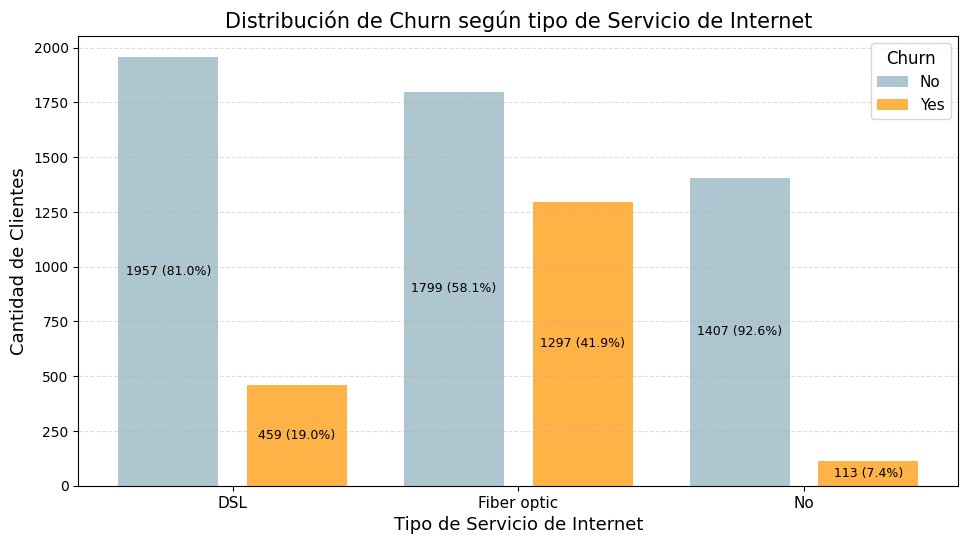

In [280]:
df_grouped = df_normalizado.groupby(['internet.InternetService', 'Churn']).size().reset_index(name='Cantidad')
total_por_categoria = df_grouped.groupby('internet.InternetService')['Cantidad'].transform('sum')
df_grouped['Porcentaje'] = (df_grouped['Cantidad'] / total_por_categoria * 100).round(1)
df_grouped['Texto'] = df_grouped.apply(lambda row: f"{row['Cantidad']} ({row['Porcentaje']}%)", axis=1)

# Categorías y churn
categories = df_grouped['internet.InternetService'].unique()
churn_values = ['No', 'Yes']
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

# Configuración posiciones y ancho
bar_width = 0.35
group_spacing = 0.2
x = np.arange(len(categories))
total_width = 2 * bar_width + group_spacing

fig, ax = plt.subplots(figsize=(10, 6))

for i, churn in enumerate(churn_values):
    offset = (i - 0.5) * (bar_width + group_spacing / 2)
    positions = x + offset
    values = []
    texts = []
    for cat in categories:
        val = df_grouped.loc[(df_grouped['internet.InternetService'] == cat) & (df_grouped['Churn'] == churn), 'Cantidad']
        pct = df_grouped.loc[(df_grouped['internet.InternetService'] == cat) & (df_grouped['Churn'] == churn), 'Porcentaje']
        if not val.empty:
            values.append(val.values[0])
            texts.append(f"{val.values[0]} ({pct.values[0]}%)")
        else:
            values.append(0)
            texts.append("")
    bars = ax.bar(positions, values, width=bar_width, label=churn, color=colors[churn])

    # Texto dentro de las barras, centrado verticalmente
    for pos, val, txt in zip(positions, values, texts):
        if val > 0:
            ax.text(pos, val / 2, txt, ha='center', va='center', fontsize=9, color='black')

# Ejes y formato
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=11)
ax.set_xlabel('Tipo de Servicio de Internet', fontsize=13)
ax.set_ylabel('Cantidad de Clientes', fontsize=13)
ax.set_title('Distribución de Churn según tipo de Servicio de Internet', fontsize=15)

ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(title='Churn', fontsize=11, title_fontsize=12)

plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.9)

plt.show()

## Fugas con y sin servicio telefonico contratado

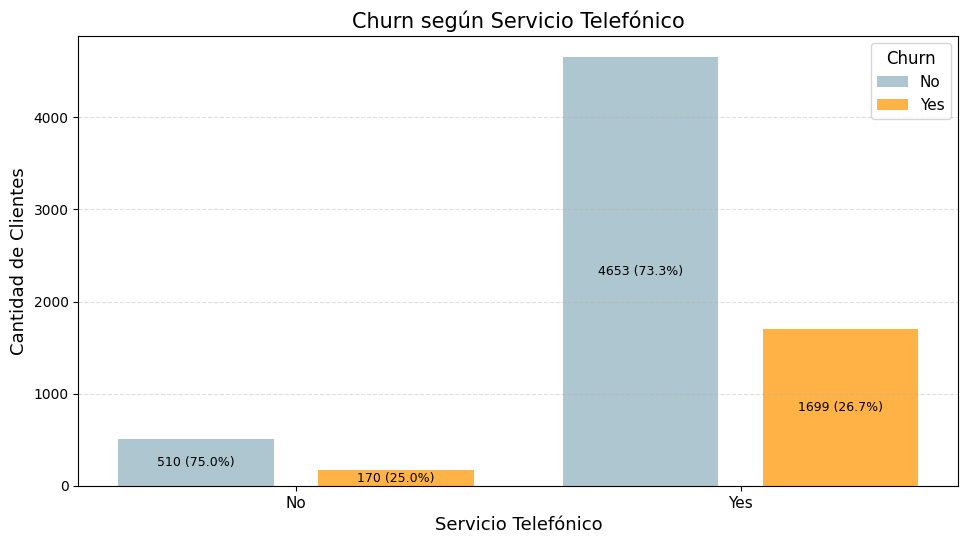

In [281]:
df_grouped = df_normalizado.groupby(['phone.PhoneService', 'Churn']).size().reset_index(name='Cantidad')
total_por_categoria = df_grouped.groupby('phone.PhoneService')['Cantidad'].transform('sum')
df_grouped['Porcentaje'] = (df_grouped['Cantidad'] / total_por_categoria * 100).round(1)
df_grouped['Texto'] = df_grouped.apply(lambda row: f"{row['Cantidad']} ({row['Porcentaje']}%)", axis=1)

# Categorías y churn
categories = df_grouped['phone.PhoneService'].unique()
churn_values = ['No', 'Yes']
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

# Configuración posiciones y ancho
bar_width = 0.35
group_spacing = 0.2
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))

for i, churn in enumerate(churn_values):
    offset = (i - 0.5) * (bar_width + group_spacing / 2)
    positions = x + offset
    values = []
    texts = []
    for cat in categories:
        val = df_grouped.loc[(df_grouped['phone.PhoneService'] == cat) & (df_grouped['Churn'] == churn), 'Cantidad']
        pct = df_grouped.loc[(df_grouped['phone.PhoneService'] == cat) & (df_grouped['Churn'] == churn), 'Porcentaje']
        if not val.empty:
            values.append(val.values[0])
            texts.append(f"{val.values[0]} ({pct.values[0]}%)")
        else:
            values.append(0)
            texts.append("")
    bars = ax.bar(positions, values, width=bar_width, label=churn, color=colors[churn])

    # Texto dentro de las barras, centrado verticalmente
    for pos, val, txt in zip(positions, values, texts):
        if val > 0:
            ax.text(pos, val / 2, txt, ha='center', va='center', fontsize=9, color='black')

# Ejes y formato
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=11)
ax.set_xlabel('Servicio Telefónico', fontsize=13)
ax.set_ylabel('Cantidad de Clientes', fontsize=13)
ax.set_title('Churn según Servicio Telefónico', fontsize=15)

ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(title='Churn', fontsize=11, title_fontsize=12)

plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.9)

plt.show()

## Fuga con o sin uso de Streaming TV

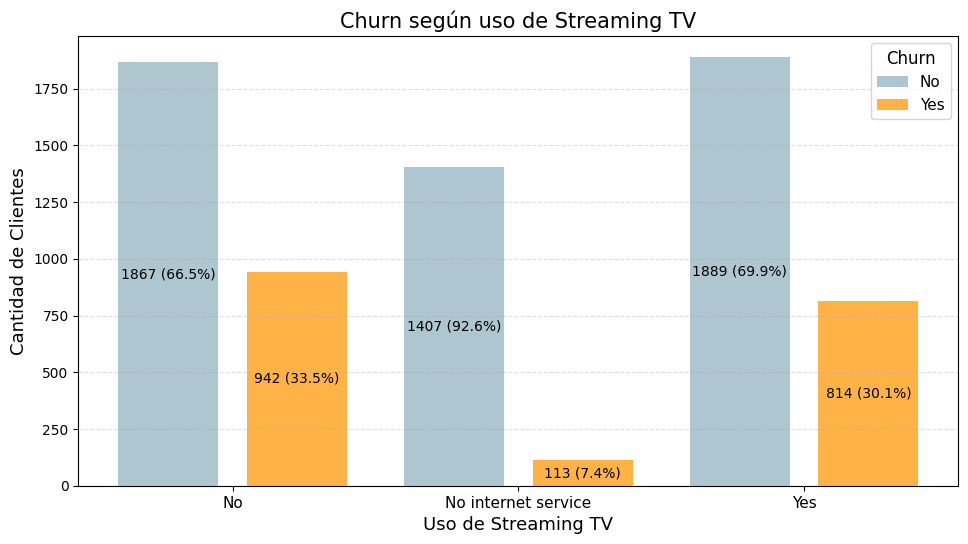

In [282]:
df_grouped = df_normalizado.groupby(['internet.StreamingTV', 'Churn']).size().reset_index(name='Cantidad')
total_por_categoria = df_grouped.groupby('internet.StreamingTV')['Cantidad'].transform('sum')
df_grouped['Porcentaje'] = (df_grouped['Cantidad'] / total_por_categoria * 100).round(1)
df_grouped['Texto'] = df_grouped.apply(lambda row: f"{row['Cantidad']} ({row['Porcentaje']}%)", axis=1)

# Categorías y churn
categories = df_grouped['internet.StreamingTV'].unique()
churn_values = ['No', 'Yes']
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

# Configuración posiciones y ancho
bar_width = 0.35
group_spacing = 0.2
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))

for i, churn in enumerate(churn_values):
    offset = (i - 0.5) * (bar_width + group_spacing / 2)
    positions = x + offset
    values = []
    texts = []
    for cat in categories:
        val = df_grouped.loc[(df_grouped['internet.StreamingTV'] == cat) & (df_grouped['Churn'] == churn), 'Cantidad']
        pct = df_grouped.loc[(df_grouped['internet.StreamingTV'] == cat) & (df_grouped['Churn'] == churn), 'Porcentaje']
        if not val.empty:
            values.append(val.values[0])
            texts.append(f"{val.values[0]} ({pct.values[0]}%)")
        else:
            values.append(0)
            texts.append("")
    bars = ax.bar(positions, values, width=bar_width, label=churn, color=colors[churn])

    # Texto dentro de las barras, centrado verticalmente
    for pos, val, txt in zip(positions, values, texts):
        if val > 0:
            ax.text(pos, val / 2, txt, ha='center', va='center', fontsize=10, color='black')

# Ejes y formato
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=11)
ax.set_xlabel('Uso de Streaming TV', fontsize=13)
ax.set_ylabel('Cantidad de Clientes', fontsize=13)
ax.set_title('Churn según uso de Streaming TV', fontsize=15)

ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(title='Churn', fontsize=11, title_fontsize=12)

plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.9)

plt.show()

## Fuga segun Metodo de Pago

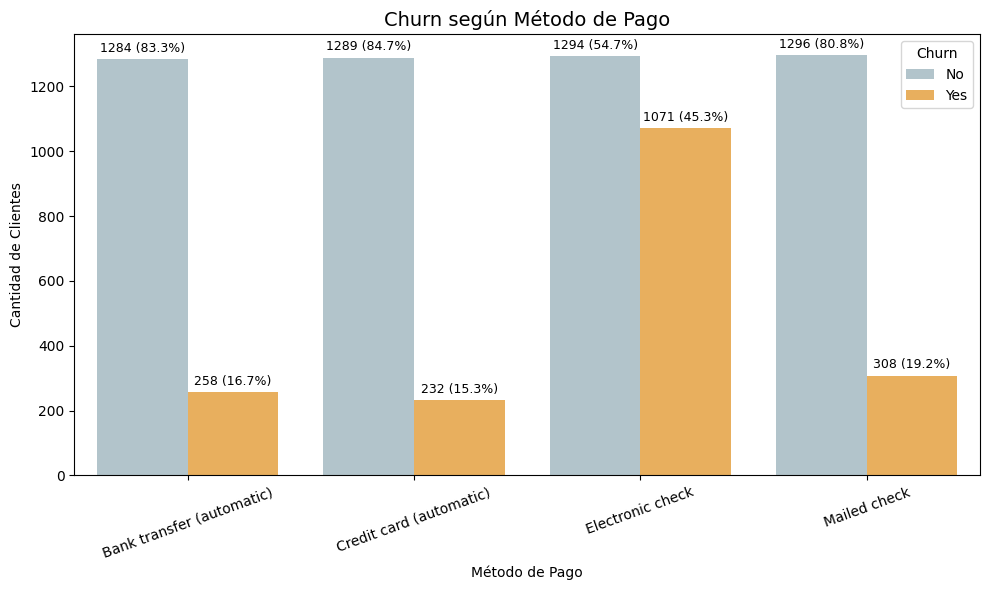

In [283]:
df_grouped = df_normalizado.groupby(['account.PaymentMethod', 'Churn']).size().reset_index(name='Cantidad')

# Calcular total por método de pago
total_por_categoria = df_grouped.groupby('account.PaymentMethod')['Cantidad'].transform('sum')

# Calcular porcentaje por grupo
df_grouped['Porcentaje'] = (df_grouped['Cantidad'] / total_por_categoria * 100).round(1)

# Crear texto combinado
df_grouped['Etiqueta'] = df_grouped.apply(lambda row: f"{row['Cantidad']} ({row['Porcentaje']}%)", axis=1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_grouped,
                      x='account.PaymentMethod',
                      y='Cantidad',
                      hue='Churn',
                      palette=['#AEC6CF', '#FFB347'])

# Agregar texto en cada barra
for bars, (_, group) in zip(barplot.containers, df_grouped.groupby('Churn')):
    for bar, label in zip(bars, group['Etiqueta']):
        height = bar.get_height()
        barplot.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(df_grouped['Cantidad']) * 0.01,
            label,
            ha='center', va='bottom', fontsize=9
        )

# Ajustes visuales
plt.title('Churn según Método de Pago', fontsize=14)
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

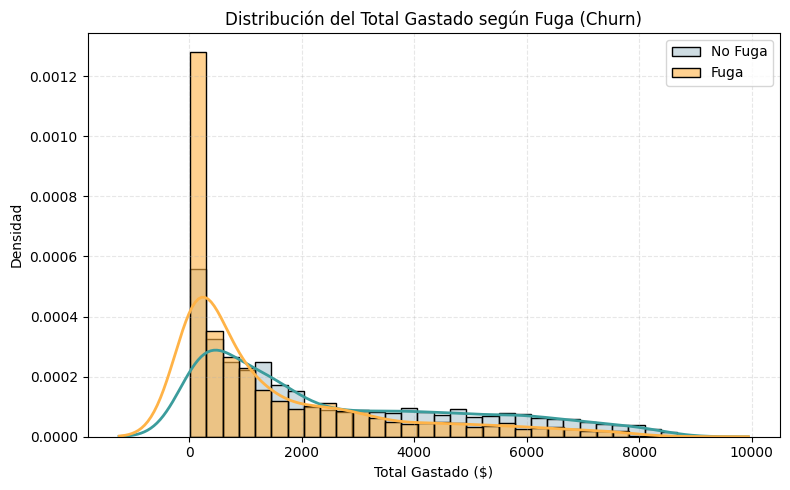

In [284]:
plt.figure(figsize=(8, 5))

# Histograma para clientes que NO se fugaron
sns.histplot(
    data=df[df['Churn'] == 'No'],
    x='account.Charges.Total',
    color='#AEC6CF',           # Azul claro
    kde=False,
    stat="density",
    bins=30,
    label='No Fuga',
    alpha=0.6,
    edgecolor='black'         # Bordes visibles
)

# Línea de densidad para NO Fuga
sns.kdeplot(
    data=df[df['Churn'] == 'No'],
    x='account.Charges.Total',
    color='#3B9C9C',           # Azul más oscuro
    lw=2,
    label=None
)

# Histograma para clientes que SÍ se fugaron
sns.histplot(
    data=df[df['Churn'] == 'Yes'],
    x='account.Charges.Total',
    color='#FFB347',           # Naranjo claro
    kde=False,
    stat="density",
    bins=30,
    label='Fuga',
    alpha=0.6,
    edgecolor='black'         # Bordes visibles
)

# Línea de densidad para Fuga
sns.kdeplot(
    data=df[df['Churn'] == 'Yes'],
    x='account.Charges.Total',
    color='#FFB347',           # Naranjo más oscuro
    lw=2,
    label=None
)

plt.title('Distribución del Total Gastado según Fuga (Churn)')
plt.xlabel('Total Gastado ($)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

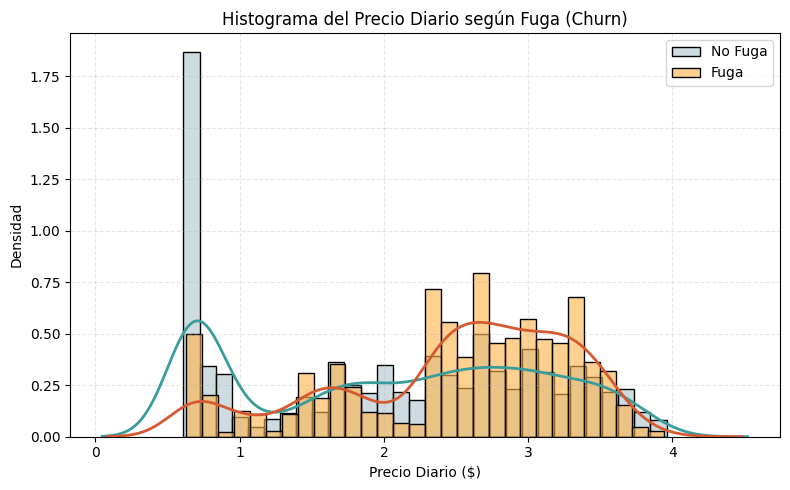

In [285]:
plt.figure(figsize=(8, 5))

# Histograma para clientes que NO se fugaron
sns.histplot(
    data=df_normalizado[df_normalizado['Churn'] == 'No'],
    x='precio_diario',
    color='#AEC6CF',           # Azul claro
    kde=False,
    stat="density",
    bins=30,
    label='No Fuga',
    alpha=0.6,
    edgecolor='black'         # Bordes visibles
)

# Línea de densidad para NO Fuga
sns.kdeplot(
    data=df_normalizado[df_normalizado['Churn'] == 'No'],
    x='precio_diario',
    color='#3B9C9C',           # Azul más oscuro
    lw=2,
    label=None
)

# Histograma para clientes que SÍ se fugaron
sns.histplot(
    data=df_normalizado[df_normalizado['Churn'] == 'Yes'],
    x='precio_diario',
    color='#FFB347',           # Naranjo claro
    kde=False,
    stat="density",
    bins=30,
    label='Fuga',
    alpha=0.6,
    edgecolor='black'         # Bordes visibles
)

# Línea de densidad para Fuga
sns.kdeplot(
    data=df_normalizado[df_normalizado['Churn'] == 'Yes'],
    x='precio_diario',
    color='#D65A31',           # Naranjo más oscuro
    lw=2,
    label=None
)

plt.title('Histograma del Precio Diario según Fuga (Churn)')
plt.xlabel('Precio Diario ($)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Estadisticas Generales

In [286]:
# ====================== Estadísticas Generales – Total Gastado ======================
print("\n" + "="*25 + " Estadísticas Generales – Total Gastado " + "="*25)
print()
tabla_total = df_normalizado.groupby('Churn')['account.Charges.Total'].agg(
    Total_Gastado_Promedio='mean',
    Total_Gastado_Mediana='median',
    Total_Gastado_DesvStd='std',
    Total_Gastado_Min='min',
    Total_Gastado_Max='max',
    Total_Gastado_Cantidad='count'
).reset_index().rename(columns={'Churn': 'Fuga (Churn)'})

# Redondeo para mejor visualización
tabla_total = tabla_total.round(2)

# Impresión en formato markdown para compatibilidad con GitHub
print(tabla_total.to_markdown(index=False))
print()

# ====================== Estadísticas Generales – Precio Diario ======================
print("\n" + "="*25 + " Estadísticas Generales – Precio Diario " + "="*25)
print()
tabla_precio = df_normalizado.groupby('Churn')['precio_diario'].agg(
    Precio_Diario_Promedio='mean',
    Precio_Diario_Mediana='median',
    Precio_Diario_DesvStd='std',
    Precio_Diario_Min='min',
    Precio_Diario_Max='max',
    Precio_Diario_Cantidad='count'
).reset_index().rename(columns={'Churn': 'Fuga (Churn)'})

# Redondeo para mejor visualización
tabla_precio = tabla_precio.round(2)

# Impresión en formato markdown para compatibilidad con GitHub
print(tabla_precio.to_markdown(index=False))


========================= Estadísticas Generales – Total Gastado =========================

| Fuga (Churn)   |   Total_Gastado_Promedio |   Total_Gastado_Mediana |   Total_Gastado_DesvStd |   Total_Gastado_Min |   Total_Gastado_Max |   Total_Gastado_Cantidad |
|:---------------|-------------------------:|------------------------:|------------------------:|--------------------:|--------------------:|-------------------------:|
| No             |                  2555.34 |                 1683.6  |                 2329.46 |               18.8  |             8672.45 |                     5163 |
| Yes            |                  1531.8  |                  703.55 |                 1890.82 |               18.85 |             8684.8  |                     1869 |


========================= Estadísticas Generales – Precio Diario =========================

| Fuga (Churn)   |   Precio_Diario_Promedio |   Precio_Diario_Mediana |   Precio_Diario_DesvStd |   Precio_Diario_Min |   Precio_Diario_M

In [287]:
# ====================== Percentiles (25%, 50%, 75%) ======================
print("\n" + "="*25 + " Percentiles (25%, 50%, 75%) " + "="*25)
print()

# Calcular percentiles
tabla_percentiles = df_normalizado.groupby('Churn')[['account.Charges.Total', 'precio_diario']] \
    .quantile([0.25, 0.5, 0.75]).unstack(level=-1)

# Renombrar columnas
tabla_percentiles.columns = [
    'Total_Gastado_P25',
    'Total_Gastado_P50',
    'Total_Gastado_P75',
    'Precio_Diario_P25',
    'Precio_Diario_P50',
    'Precio_Diario_P75'
]

tabla_percentiles.reset_index(inplace=True)
tabla_percentiles.rename(columns={'Churn': 'Fuga (Churn)'}, inplace=True)

# Redondear resultados
tabla_percentiles = tabla_percentiles.round(2)

# Mostrar en formato markdown
print(tabla_percentiles.to_markdown(index=False))
print()



========================= Percentiles (25%, 50%, 75%) =========================

| Fuga (Churn)   |   Total_Gastado_P25 |   Total_Gastado_P50 |   Total_Gastado_P75 |   Precio_Diario_P25 |   Precio_Diario_P50 |   Precio_Diario_P75 |
|:---------------|--------------------:|--------------------:|--------------------:|--------------------:|--------------------:|--------------------:|
| No             |              577.83 |             1683.6  |             4264.12 |                0.84 |                2.15 |                2.95 |
| Yes            |              134.5  |              703.55 |             2331.3  |                1.87 |                2.66 |                3.14 |



In [288]:
# ====================== Promedio y Mediana ======================
print("\n" + "="*25 + " Promedio y Mediana " + "="*25)
print()

# Calcular tabla
tabla_simple = df_normalizado.groupby('Churn')[['account.Charges.Total', 'precio_diario']] \
    .agg(['mean', 'median'])

# Aplanar columnas
tabla_simple.columns = [
    'Total_Gastado_Promedio',
    'Total_Gastado_Mediana',
    'Precio_Diario_Promedio',
    'Precio_Diario_Mediana'
]

tabla_simple.reset_index(inplace=True)
tabla_simple.rename(columns={'Churn': 'Fuga (Churn)'}, inplace=True)

# Redondear
tabla_simple = tabla_simple.round(2)

# Mostrar en formato markdown
print(tabla_simple.to_markdown(index=False))



========================= Promedio y Mediana =========================

| Fuga (Churn)   |   Total_Gastado_Promedio |   Total_Gastado_Mediana |   Precio_Diario_Promedio |   Precio_Diario_Mediana |
|:---------------|-------------------------:|------------------------:|-------------------------:|------------------------:|
| No             |                  2555.34 |                 1683.6  |                     2.04 |                    2.15 |
| Yes            |                  1531.8  |                  703.55 |                     2.48 |                    2.66 |


#📄Informe final

- Puedes revisar el informe haciendo clic aquí [🔍 Ver en GitHub](./Informe_Challenge2_TelecomX.ipynb)